## House Price prediction -> Supervised Machine learning

Linear Regression

#### By Divyanshi Maurya

## Dataset description

1. Transaction data: Date on which transaction happen

2. House Age: Age of the house

3. Distance to the nearest MRT train station: MRT is generally known as Mass Rapid Transit, for fast and reliable public transport

4. Number of convenience store : number of convenience store near the house

5. latitude: latitude of the house

6. longitude: longitude of the house

7. house price of the house per unit area: Our target variable (y)

## Problem Statement

The objective of this project is to build a predictive model that estimates house prices based on various features such as the size of the house (in square feet), the age of the house, the location (neighborhood), and additional amenities. Real estate prices are influenced by a variety of factors, and accurately predicting house prices can assist both buyers and sellers in making informed decisions. The dataset used for this task includes historical data of house prices along with their respective features. The task is to develop a linear regression model that can predict the price of a house given these attributes. The success of the model will be measured by its ability to accurately predict prices on unseen data using performance metrics such as R-squared, Mean Absolute Error (MAE), and Root Mean Squared Error (RMSE). This model can potentially assist in price forecasting, real estate investment, and market trend analysis.

In [ ]:
import pandas as pd

df=pd.read_excel("Real estate valuation data set.xlsx")

In [ ]:
df

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.666667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250000,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000000,8.1,104.81010,5,24.96674,121.54067,52.5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [ ]:
df.dtypes

No                                          int64
X1 transaction date                       float64
X2 house age                              float64
X3 distance to the nearest MRT station    float64
X4 number of convenience stores             int64
X5 latitude                               float64
X6 longitude                              float64
Y house price of unit area                float64
dtype: object

In [ ]:
df.shape

(414, 8)

In [ ]:
df.drop(columns=['No']).describe()


,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [ ]:
null_counts=df.isna().sum()
null_counts

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

### Checking every feature distribution

#### House Age

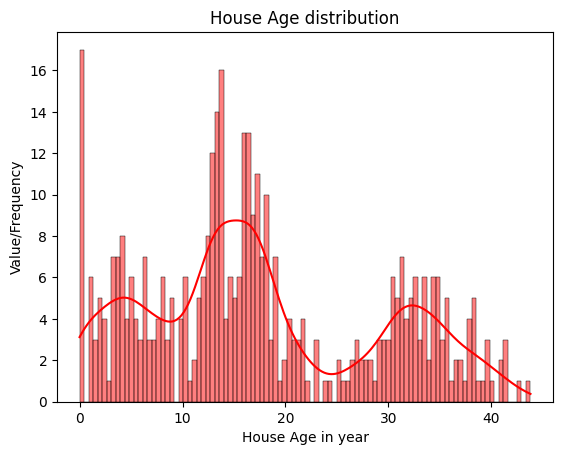

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['X2 house age'],bins=100, kde=True, color='red', kde_kws={'bw_adjust':0.5})
plt.title('House Age distribution')
plt.xlabel('House Age in year')
plt.ylabel('Value/Frequency')
plt.show()

By the above graph -> we can see it is continuous

having three peaks-> trimodal distribution

It indicates that there are three clusters and subgroups
1. Newer homes-> with age range between 0-10
2. Middle age homes -> most frequency -> 10-25
3. older homes -> 25-40


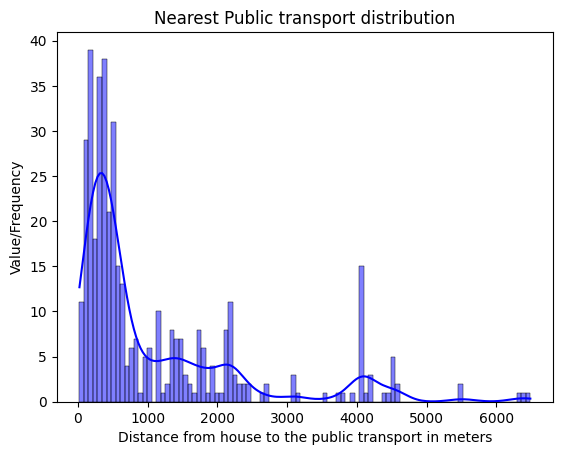

In [ ]:
import seaborn as sns
#MRT -> Mass Rapid transit ->public transportation
sns.histplot(df['X3 distance to the nearest MRT station'], kde=True, bins=100, color='blue', kde_kws={'bw_adjust': 0.5})
plt.title('Nearest Public transport distribution')
plt.xlabel('Distance from house to the public transport in meters')
plt.ylabel('Value/Frequency')
plt.show()

Most houses are near the station -> 0-2000m

The distribution is right skewed -> mode < median < mean





In [ ]:
from scipy.stats import mode

mode_station_distance=mode(df['X3 distance to the nearest MRT station'])
mode_station_distance



ModeResult(mode=np.float64(289.3248), count=np.int64(13))

majority most frequent -> 13 homes are distance of 289.3248m from the station

In [ ]:

import numpy as np

median_station_distance=np.percentile(df['X3 distance to the nearest MRT station'],50)
median_station_distance

np.float64(492.2313)

So most homes -> 492.2313 m from the station

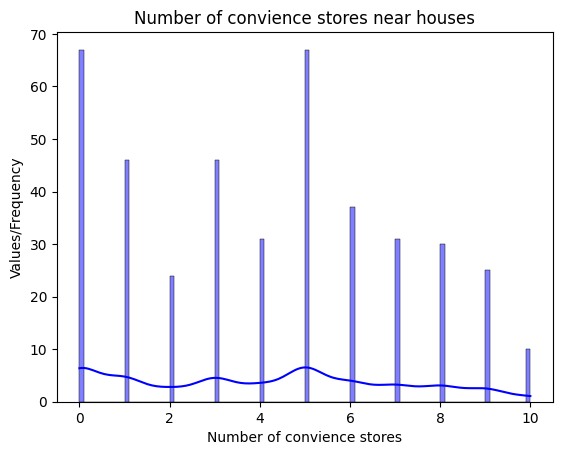

In [ ]:
sns.histplot(df['X4 number of convenience stores'],bins=100,kde=True, kde_kws={'bw_adjust':0.5},color='blue')
plt.title('Number of convience stores near houses')
plt.xlabel('Number of convience stores')
plt.ylabel('Values/Frequency')
plt.show()

so by the above histogram the variable -> is discerte


## Outlier Analysis

Discrete Variables

In [ ]:
import numpy as np

# Calculate Q1 and Q3 for 'X4 number of convenience stores'
Q3 = np.percentile(df['X4 number of convenience stores'], 75)
Q1 = np.percentile(df['X4 number of convenience stores'], 25)
print("Q3: ", Q3, "\nQ1: ", Q1)

# Calculate IQR
iqr = Q3 - Q1
print("IQR: ", iqr)

# Calculate upper and lower limits
upper_limit = Q3 + 1.5 * iqr
lower_limit = Q1 - 1.5 * iqr

# Get min and max values
min_value = df['X4 number of convenience stores'].min()
max_value = df['X4 number of convenience stores'].max()

# Print results
print("Min Value: ", min_value, "\nMax Value: ", max_value)
print("Upper Limit: ", upper_limit, "\nLower Limit: ", lower_limit)


Q3:  6.0 
Q1:  1.0
IQR:  5.0
Min Value:  0 
Max Value:  10
Upper Limit:  13.5 
Lower Limit:  -6.5


No outliers-> as upper limit and lower limit is more than the min and max values

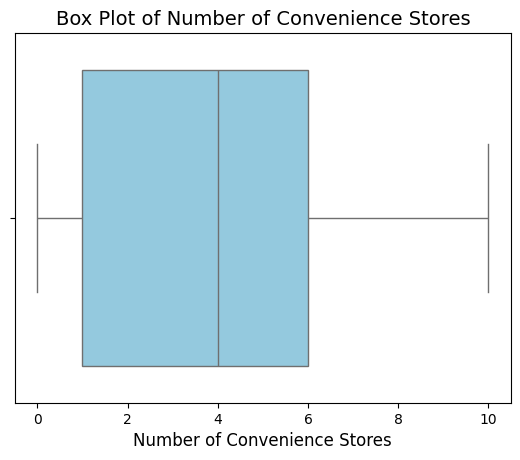

In [ ]:
sns.boxplot(x=df['X4 number of convenience stores'], color='skyblue')

# Add labels and title
plt.title("Box Plot of Number of Convenience Stores", fontsize=14)
plt.xlabel("Number of Convenience Stores", fontsize=12)
plt.show()

Continuous Variables

In [ ]:
#Z-score

mean = np.mean(df['X2 house age'])
std_dev = np.std(df['X2 house age'])

# Step 2: Calculate the z-scores for each data point
z_scores = [(x - mean) / std_dev for x in df['X2 house age']]

# Step 3: Identify outliers (z-scores greater than 3 or less than -3)
outliers = [x for x, z in zip(df['X2 house age'], z_scores) if z > 3 or z < -3]

# Print the results
print("Mean:", mean)
print("Standard Deviation:", std_dev)
print("Z-scores:", z_scores)
print("Outliers:", outliers)



Mean: 17.71256038647343
Standard Deviation: 11.378717175302857
Z-scores: [np.float64(1.255628327289565), np.float64(0.15708621507933687), np.float64(-0.38779067257693617), np.float64(-0.38779067257693617), np.float64(-1.1172226350845276), np.float64(-0.9326675602332094), np.float64(1.4753367497316106), np.float64(0.22739291026079153), np.float64(1.2292633165965194), np.float64(0.01647282471642756), np.float64(1.5017017604246559), np.float64(-1.002974255414664), np.float64(-0.4141556832699817), np.float64(0.23618124715847316), np.float64(-0.3965790094746181), np.float64(1.5807967925037927), np.float64(-1.556639479968619), np.float64(-0.0011038490789360268), np.float64(-0.07141054426039069), np.float64(-1.4248144265033915), np.float64(-1.1611643195729369), np.float64(-0.6338641057120273), np.float64(-0.2647539560093908), np.float64(-0.6690174533027546), np.float64(1.9235419315133837), np.float64(1.0183432310521556), np.float64(-1.2842010361404823), np.float64(-0.6426524426097091), np.flo

In [ ]:
mean = np.mean(df['X3 distance to the nearest MRT station'])
std_dev = np.std(df['X3 distance to the nearest MRT station'])

# Step 2: Calculate the z-scores for each data point
z_scores = [(x - mean) / std_dev for x in df['X3 distance to the nearest MRT station']]

# Step 3: Identify outliers (z-scores greater than 3 or less than -3)
outliers = [x for x, z in zip(df['X3 distance to the nearest MRT station'], z_scores) if z > 3 or z < -3]

# Print the results
print("Mean:", mean)
print("Standard Deviation:", std_dev)
print("Z-scores:", z_scores)
print("Outliers:", outliers)

Mean: 1083.8856889130436
Standard Deviation: 1260.5843868803893
Z-scores: [np.float64(-0.7924950358819846), np.float64(-0.616611626324067), np.float64(-0.41401527287245726), np.float64(-0.41401527287245726), np.float64(-0.5499967286036433), np.float64(0.8655860904221162), np.float64(-0.36523741980688984), np.float64(-0.631677813243136), np.float64(3.512777373076509), np.float64(0.5547381979063882), np.float64(-0.5383791009759981), np.float64(-0.7880707069294405), np.float64(-0.46934929154344895), np.float64(1.099299123096663), np.float64(0.06421808165282117), np.float64(-0.40035192738027303), np.float64(-0.6273978141759161), np.float64(-0.5815034650136419), np.float64(-0.5677917292664022), np.float64(-0.8412787433751309), np.float64(0.9455862879888727), np.float64(-0.6383651085069316), np.float64(0.21914701939995437), np.float64(-0.6383651085069316), np.float64(-0.4784986988501209), np.float64(0.3204722470716181), np.float64(-0.5553164835282586), np.float64(-0.6405256937310119), np.flo

In [ ]:
df.shape

(414, 8)

In [ ]:
df.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

<Axes: >

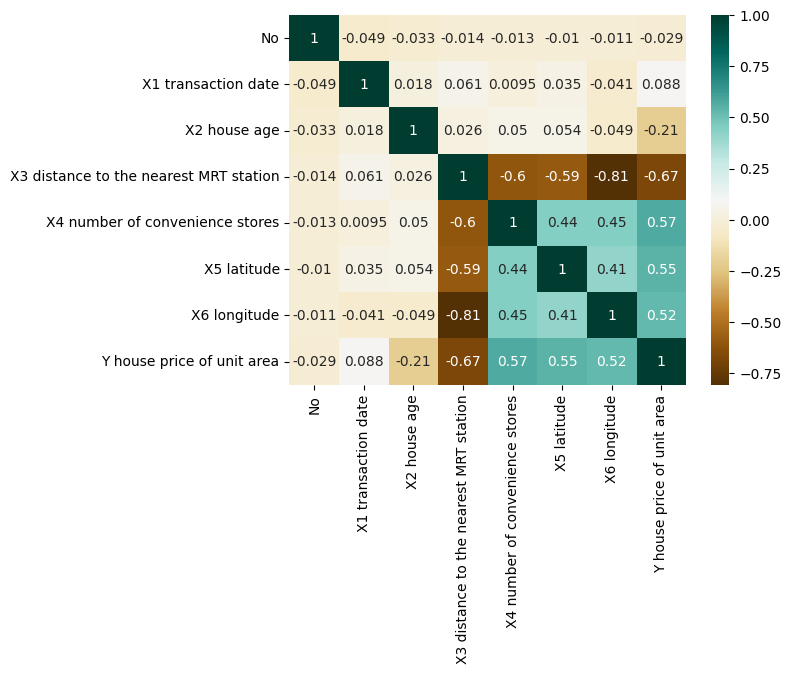

In [ ]:
numerical_columns=df.select_dtypes(include=['number'])

plt.Figure(figsize=(10,5))
sns.heatmap(numerical_columns.corr(),annot=True,cmap='BrBG')

### Conclusions:

1. There is negative correlation between: 

a. Nearest MRT station (-0.67)
b. House age (-0.21)

2. There is positive correlation between:

a. number of convience store (0.57)
b. longitude (0.55)
d. latitude (0.52)



In [ ]:
df.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
import statsmodels.api as sm

X=df[['X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station','X4 number of convenience stores','X5 latitude','X6 longitude']]

X=sm.add_constant(X)

vif_data=pd.DataFrame()
vif_data['Feature']=X.columns
vif_data['VIF']=[vif(X.values,i) for i in range(X.shape[1]) ]

# Round the VIF values to the nearest integer and convert to int
vif_data["VIF"] = vif_data["VIF"].round(0).astype(int)

print(vif_data)

                                  Feature        VIF
0                                   const  242239348
1                     X1 transaction date          1
2                            X2 house age          1
3  X3 distance to the nearest MRT station          4
4         X4 number of convenience stores          2
5                             X5 latitude          2
6                            X6 longitude          3


In [ ]:
vif_data.columns

Index(['Feature', 'VIF'], dtype='object')

In [ ]:
# Define Y (target variable)
y = df['Y house price of unit area']  # Replace with the actual column name for target
# Define X (independent variables)
X = df[['X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station',
        'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']]


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test=train_test_split(X,y, train_size=0.8, random_state=10)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

model=LinearRegression()
model.fit(X_train, Y_train)
Y_pred=model.predict(X_test)

print("The mean absolute error of training data is:")
print(mean_absolute_error(Y_test,Y_pred))

The mean absolute error of training data is:
6.31000911752856


In [ ]:
slope,intercept=np.polyfit(Y_test, Y_pred,1)

In [ ]:
print("slope: ",slope)
print("intercept: ",intercept)

slope:  0.5384777521514187
intercept:  16.8477452295346


In [ ]:
best_fit_line=slope*(Y_test)+intercept

C:\Users\DELL\AppData\Local\Temp\ipykernel_14988\3141383974.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(Y_test,Y_pred,marker='o',edgecolors='black',cmap='RgRb')


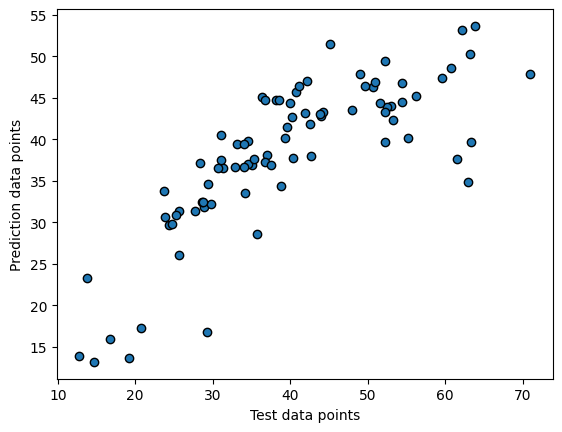

In [ ]:
plt.scatter(Y_test,Y_pred,marker='o',edgecolors='black',)
plt.xlabel("Test data points")
plt.ylabel("Prediction data points")

plt.show()

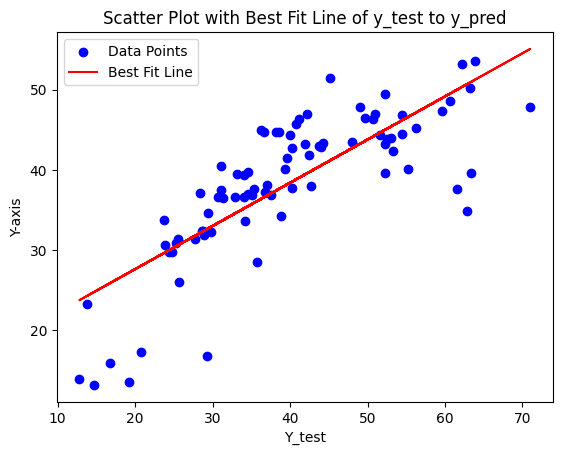

In [ ]:
plt.scatter(Y_test, Y_pred, color='blue', label='Data Points')
plt.plot(Y_test, best_fit_line, color='red', label='Best Fit Line')

plt.title('Scatter Plot with Best Fit Line of y_test to y_pred')
plt.xlabel('Y_test')
plt.ylabel('Y-axis')

plt.legend()


plt.show()

In [ ]:
max_value=max(Y_test)
min_value=min(Y_test)

print("Range: ",min_value," is between ",max_value)

Range:  12.8  is between  71.0


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate MAE, MSE, RMSE, and R²
mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, Y_pred)

# Print the results
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)


Mean Absolute Error (MAE): 6.31000911752856
Mean Squared Error (MSE): 69.5030441471627
Root Mean Squared Error (RMSE): 8.336848574081378
R-squared (R²): 0.5941551132011338


# Conclusions:

R^2 is 0.594 so, the variance is 59.

59% of the variation in the target variable (house price per unit area